In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import collections
import tweepy as tw
import nltk
from nltk.corpus import stopwords
import re
import networkx
from textblob import TextBlob
import warnings
warnings.filterwarnings("ignore")
sns.set(font_scale=1.5)
sns.set_style("whitegrid")

In [2]:
consumer_key= '#your consumer key'
consumer_secret= 'your consumer secret key'
access_token= 'your access token'
access_token_secret= 'your access token secret'

auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)

In [3]:
def remove_url(txt):
    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())

search_term = "@PMOIndia-filter:retweets"
tweets = tw.Cursor(api.search, q=search_term, lang="en", since='2018-01-01').items(100)
tweets_no_urls = [remove_url(tweet.text) for tweet in tweets]

In [4]:
for tweet in tweets_no_urls:
    print(tweet) 

ProfKapilKumar PMOIndia nsitharaman And leaders government employees and salaried class must be included in thi
How did Suhrita Das know about Sushants death much before the news flashed on the media on 14th June No Politic
ROChennaiNorth epfobhatinda rochennaisouth epfobandra socialepfo Ministrylabour PMOIndia This is happening w
kundukoushani smitaparikh2 PMOIndia HMOIndia DoPTGoI Vulturewood knows more than Sushanta about his hight Ho
BSYBJP HMOIndia PMOIndia rashtrapatibhvn Why Hindu lives doesnt matter
PMOIndia Please pay attention to my issue
MoHFWINDIA MoHmv puneetsapaliga health PMOIndia COVID19 CovidVaccine COVID19Vaccine Pune In india w
He and anki also had photos with DishaCBI SPEAK ON SSR CASEipsnupurprasad PMOIndia HMOIndia
PMOIndia HMOIndia DevFadnavis KiritSomaiya Justice To Sushant is Justice to the Common Man No Politics In S
dpradhanbjp PMOIndia Your permission to allow for such fitments will give a big relief to middle class citizens
Reaproy mfarussia MFAChina PMOInd

In [5]:
sentiment_objects = [TextBlob(tweet) for tweet in tweets_no_urls]
sentiment_objects[0].polarity, sentiment_objects[:100000]

(0.0,
 [TextBlob("ProfKapilKumar PMOIndia nsitharaman And leaders government employees and salaried class must be included in thi"),
  TextBlob("How did Suhrita Das know about Sushants death much before the news flashed on the media on 14th June No Politic"),
  TextBlob("ROChennaiNorth epfobhatinda rochennaisouth epfobandra socialepfo Ministrylabour PMOIndia This is happening w"),
  TextBlob("kundukoushani smitaparikh2 PMOIndia HMOIndia DoPTGoI Vulturewood knows more than Sushanta about his hight Ho"),
  TextBlob("BSYBJP HMOIndia PMOIndia rashtrapatibhvn Why Hindu lives doesnt matter"),
  TextBlob("PMOIndia Please pay attention to my issue"),
  TextBlob("MoHFWINDIA MoHmv puneetsapaliga health PMOIndia COVID19 CovidVaccine COVID19Vaccine Pune In india w"),
  TextBlob("He and anki also had photos with DishaCBI SPEAK ON SSR CASEipsnupurprasad PMOIndia HMOIndia"),
  TextBlob("PMOIndia HMOIndia DevFadnavis KiritSomaiya Justice To Sushant is Justice to the Common Man No Politics In S"),
  Te

In [6]:
sentiment_values = [[tweet.sentiment.polarity, str(tweet)] for tweet in sentiment_objects]
sentiment_values[:100000]

[[0.0,
  'ProfKapilKumar PMOIndia nsitharaman And leaders government employees and salaried class must be included in thi'],
 [0.2,
  'How did Suhrita Das know about Sushants death much before the news flashed on the media on 14th June No Politic'],
 [0.0,
  'ROChennaiNorth epfobhatinda rochennaisouth epfobandra socialepfo Ministrylabour PMOIndia This is happening w'],
 [0.5,
  'kundukoushani smitaparikh2 PMOIndia HMOIndia DoPTGoI Vulturewood knows more than Sushanta about his hight Ho'],
 [0.0,
  'BSYBJP HMOIndia PMOIndia rashtrapatibhvn Why Hindu lives doesnt matter'],
 [0.0, 'PMOIndia Please pay attention to my issue'],
 [0.0,
  'MoHFWINDIA MoHmv puneetsapaliga health PMOIndia COVID19 CovidVaccine COVID19Vaccine Pune In india w'],
 [0.0,
  'He and anki also had photos with DishaCBI SPEAK ON SSR CASEipsnupurprasad PMOIndia HMOIndia'],
 [-0.3,
  'PMOIndia HMOIndia DevFadnavis KiritSomaiya Justice To Sushant is Justice to the Common Man No Politics In S'],
 [0.0,
  'dpradhanbjp PMOIndi

In [7]:
sentiment_df = pd.DataFrame(sentiment_values, columns=["polarity", "tweet"])
sentiment_df.head(1000)

,polarity,tweet
0,0.000000,ProfKapilKumar PMOIndia nsitharaman And leader...
1,0.200000,How did Suhrita Das know about Sushants death ...
2,0.000000,ROChennaiNorth epfobhatinda rochennaisouth epf...
3,0.500000,kundukoushani smitaparikh2 PMOIndia HMOIndia D...
4,0.000000,BSYBJP HMOIndia PMOIndia rashtrapatibhvn Why H...
...,...,...
95,0.136364,Is Justice for Sale Is this going to be Our Ne...
96,0.195833,Public has initiated this movement and we dema...
97,0.000000,Khushi4justice SubhBiswas4U nilotpalm3 baby555...
98,0.285714,It cannot be denied on seeing this This is the...


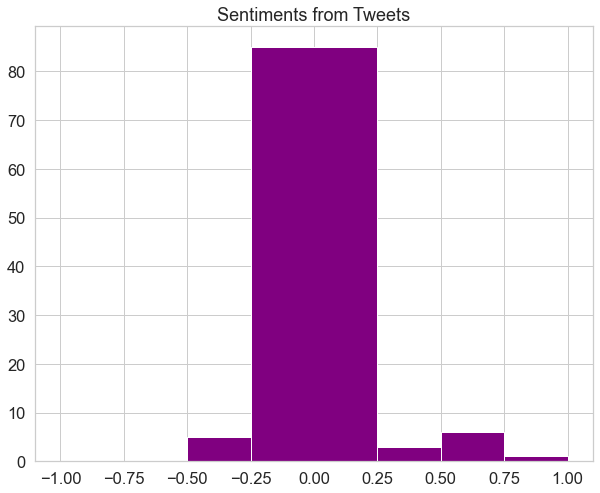

In [8]:
fig, ax = plt.subplots(figsize=(10, 8))
sentiment_df.hist(bins=[-1, -0.75, -0.5, -0.25, 0.25, 0.5, 0.75, 1], ax=ax, color="purple")
plt.title("Sentiments from Tweets")
plt.show()

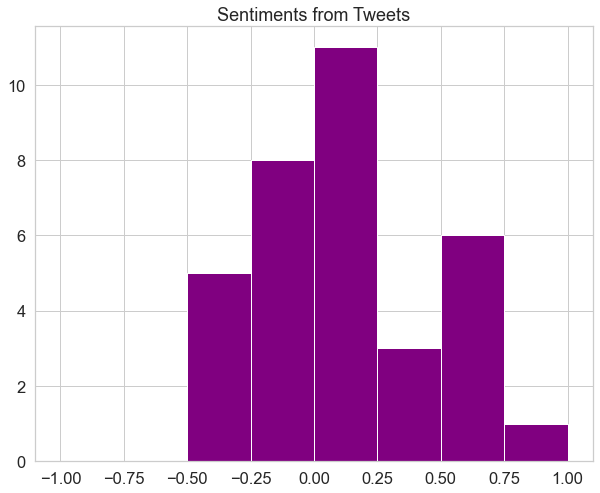

In [9]:
sentiment_df = sentiment_df[sentiment_df.polarity != 0]
fig, ax = plt.subplots(figsize=(10, 8))
sentiment_df.hist(bins=[-1, -0.75, -0.5, -0.25, 0.0, 0.25, 0.5, 0.75, 1], ax=ax, color="purple")
plt.title("Sentiments from Tweets")
plt.show()